# Chapter 5.4 - Linear Classification

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore")

## Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a classification and dimensionality reduction technique that is used to find the linear combination of features that best separates two or more classes of data. LDA assumes that **the data from different classes are normally distributed** with the **same covariance matrix but different means**. Here's how it works step-by-step:

#### 1. Understanding the Problem
You have a dataset with multiple classes (e.g., species of flowers) and features (e.g., petal length, petal width).
The goal is to find a way to project the data onto a new space where the separation between the classes is maximized.

#### 2. Maximizing Separation between Classes
LDA tries to maximize the distance between the means of different classes (this increases class separability) while minimizing the variance within each class (this reduces overlap).
It finds a linear boundary between different classes of data.

#### 3. Steps in LDA

    a. Compute the Mean Vectors
    b. Compute Within-Class Scatter Matrix (Sw)
    c. Compute Between-Class Scatter Matrix (Sb)
    d. Find the Projection Directions
    e. Project the Data

#### 4. Classification
Once the data is projected, LDA can be used as a classifier. In the new space, LDA classifies new samples by assigning them to the class with the closest mean.

#### 5. Dimensionality Reduction
LDA is often used for dimensionality reduction as it projects the data into a lower-dimensional space (while maximizing class separability). This is similar to Principal Component Analysis (PCA), but the key difference is that LDA focuses on maximizing class separability, whereas PCA focuses on capturing the overall variance in the data.

Accuracy: 100.00%


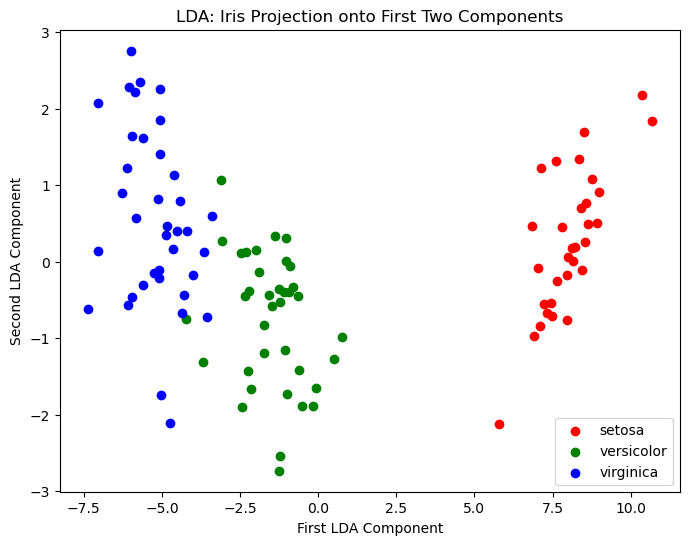

In [6]:
# Import necessary libraries
from sklearn import datasets                           
from sklearn.model_selection import train_test_split   
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.metrics import accuracy_score             

# Load the Iris dataset
iris = datasets.load_iris()  # Load the iris dataset from sklearn
X = iris.data                # Feature matrix (input data)
y = iris.target              # Labels (species/classes)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,             # Split data into training and test sets
                                                    test_size=0.3,    # Use 30% of the data for testing
                                                    random_state=42)  # Set random seed for reproducibility

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()  # Initialize an LDA model

# Fit the model on the training data
lda.fit(X_train, y_train)           # Train the LDA model using the training data

# Make predictions on the test data
y_pred = lda.predict(X_test)        # Predict the labels for the test set

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the predictions
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy as a percentage

# Plot LDA projections on the first two components
X_lda = lda.transform(X_train)  # Project the training data onto the first two LDA components
plt.figure(figsize=(8, 6))      # Set the figure size for the plot

for label, color in zip([0, 1, 2], ['red', 'green', 'blue']):  # Loop through the three classes and their colors
    plt.scatter(X_lda[y_train == label, 0],                    # Scatter plot of the first LDA component
                X_lda[y_train == label, 1],                    # Scatter plot of the second LDA component
                label=iris.target_names[label],                # Set the label to the corresponding species name
                color=color)                                   # Set the color for each class

plt.title('LDA: Iris Projection onto First Two Components')  # Set the plot title
plt.xlabel('First LDA Component')                            # Label the x-axis
plt.ylabel('Second LDA Component')                           # Label the y-axis
plt.legend()                                                 # Add a legend to the plot
plt.show()                                                   # Display the plot

### How many parameters are required to estimate to perform a LDA ?

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Dataset
n_samples, n_features = 100, 2                     # Define the number of samples and features
mean0, mean1 = np.array([0, 0]), np.array([0, 2])  # Define the mean vectors for the two classes
Cov = np.array([[1, .8], [.8, 1]])                 # Define the covariance matrix for both classes

np.random.seed(42)                                 # Set random seed for reproducibility

# Generate samples from multivariate normal distribution for class 0 and class 1
X0 = np.random.multivariate_normal(mean0, Cov, n_samples)  # Samples for class 0
X1 = np.random.multivariate_normal(mean1, Cov, n_samples)  # Samples for class 1

# Combine the samples for both classes
X = np.vstack([X0, X1])                              # Stack samples from class 0 and class 1
y = np.array([0] * X0.shape[0] + [1] * X1.shape[0])  # Create label array (0 for class 0, 1 for class 1)

# LDA with scikit-learn
lda = LDA()                                        # Initialize Linear Discriminant Analysis (LDA) model
proj = lda.fit(X, y).transform(X)                  # Fit the LDA model on data X and labels y, then transform X

y_pred_lda = lda.predict(X)                        # Predict class labels using the trained LDA model
errors = y_pred_lda != y                           # Identify the misclassified samples (where prediction differs from true label)

# Output the number of errors and the error rate
print("Nb errors = %i\nError rate = %.2f" % (errors.sum(), errors.sum() / len(y_pred_lda)))

Nb errors = 10
Error rate = 0.05


#### What this code does:
- *Data generation*: The code generates two sets of 2D data samples from multivariate normal distributions with different means but the same covariance matrix.
- *LDA application*: The LDA model is trained on the data to project it onto a 1D space where class separation is maximized.
- *Prediction*: LDA predicts the class labels for the samples, and the number of misclassified samples (errors) and error rate are computed.

#### Results:

`Nb errors = 10`: Out of the total number of predictions made by the logistic regression model, there are 10 incorrect predictions (i.e., where the predicted class does not match the actual class).

`Error rate = 0.05`: This is the proportion of incorrect predictions out of the total number of predictions (5% of the predictions were wrong).

## Logistic Regression

Logistic regression is called a generalized linear models. ie.: it is a linear model with a link
function that maps the output of linear multiple regression to the posterior probability of class
1 𝑝(1|𝑥) using the logistic sigmoid function:

    𝑝(1|𝑤, 𝑥𝑖) = 1/(1 + exp(−𝑤 · 𝑥𝑖))

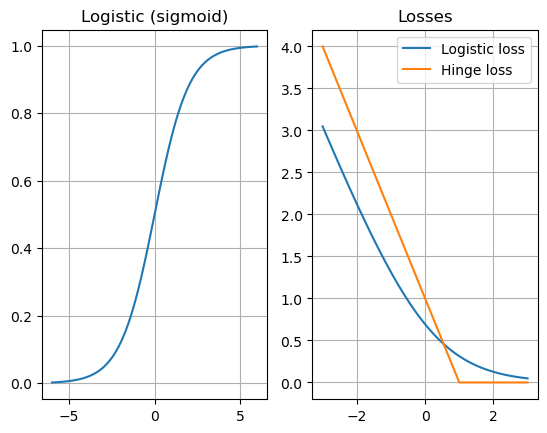

In [11]:
def logistic(x):                                          # Define the logistic (sigmoid) function
    return 1 / (1 + np.exp(-x))                           # Apply the logistic function formula
    
def logistic_loss(x):                                     # Define the logistic loss function
    return np.log(1 + np.exp(-x))                         # Apply the logistic loss formula (log(1 + exp(-x)))
    
x1 = np.linspace(-6, 6, 100)                              # Create a range of 100 points between -6 and 6 for plotting

plt.subplot(121)                                          # Create the first subplot (1 row, 2 columns, 1st plot)
plt.plot(x1, logistic(x1))                                # Plot the logistic (sigmoid) function
plt.grid(True)                                            # Add grid to the plot for better visualization
plt.title('Logistic (sigmoid)')                           # Set title for the plot

x2 = np.linspace(-3, 3, 100)                              # Create a range of 100 points between -3 and 3 for loss functions

plt.subplot(122)                                          # Create the second subplot (1 row, 2 columns, 2nd plot)
plt.plot(x2, logistic_loss(x2), label='Logistic loss')    # Plot the logistic loss function
plt.plot(x2, np.maximum(0, 1 - x2), label='Hinge loss')   # Plot the hinge loss function (max(0, 1 - x))
plt.legend()                                              # Display the legend to differentiate between the losses
plt.title('Losses')                                       # Set title for the plot
plt.grid(True)                                            # Add grid to the plot for better visualization

Imbalanced group sizes cannot be explicitly controlled. It can be managed using a reweighting of the input samples.

In the code below, C is the inverse of regularization strength. A high value (1e8) means little to no regularization. 'lbfgs' is the solver used to optimize the model, suitable for small to medium datasets.

In [13]:
from sklearn import linear_model 

''' (Used before)
# Dataset
n_samples, n_features = 100, 2                     # Define the number of samples and features
mean0, mean1 = np.array([0, 0]), np.array([0, 2])  # Define the mean vectors for the two classes
Cov = np.array([[1, .8], [.8, 1]])                 # Define the covariance matrix for both classes

np.random.seed(42)                                 # Set random seed for reproducibility

# Generate samples from multivariate normal distribution for class 0 and class 1
X0 = np.random.multivariate_normal(mean0, Cov, n_samples)  # Samples for class 0
X1 = np.random.multivariate_normal(mean1, Cov, n_samples)  # Samples for class 1

# Combine the samples for both classes
X = np.vstack([X0, X1])                              # Stack samples from class 0 and class 1
y = np.array([0] * X0.shape[0] + [1] * X1.shape[0])  # Create label array (0 for class 0, 1 for class 1)
'''

logreg = linear_model.LogisticRegression(C=1e8, solver='lbfgs')  # Initialize the logistic regression model

logreg.fit(X, y)                                                 # Fit the logistic regression model to the data (X, y)

y_pred_logreg = logreg.predict(X)                                # Predict labels based on the fitted model
errors = y_pred_logreg != y                                      # Identify where predictions do not match actual labels

# Print the number of errors and the error rate (number of errors divided by the total number of predictions)
print("Nb errors = %i, \nError rate = %.2f" % (errors.sum(), errors.sum() / len(y_pred_logreg)))

print(logreg.coef_)                                              # Print the learned coefficients (weights) of the model

Nb errors = 10, 
Error rate = 0.05
[[-5.15181387  5.57176321]]


#### Interpretation

`Nb errors=10`: Out of the total number of predictions made by the logistic regression model, there are 10 incorrect predictions (i.e., where the predicted class does not match the actual class).

`error rate=0.05`: This is the proportion of incorrect predictions out of the total number of predictions (5% of the predictions were wrong).

`[[-5.15181387 5.57176321]]`: These values represent the learned weights for the logistic regression model, one for each feature in the input data X. The logistic regression model uses these coefficients to form a linear combination of the input features and then applies the logistic (sigmoid) function to predict probabilities.

- A large negative coefficient (e.g., -5.15 for the first feature) means that as the value of this feature increases, the model is more likely to predict class 0 (since it reduces the log-odds).

- A large positive coefficient (e.g., 5.57 for the second feature) means that as the value of this feature increases, the model is more likely to predict class 1 (since it increases the log-odds).

### Exercise
**Explore the Logistic Regression parameters and proposes a solution in cases of highly imbalanced training dataset 𝑁1 ≫ 𝑁0 when we know that in reality both classes have the same probability 𝑝(𝐶1) = 𝑝(𝐶0).**

In cases where the training dataset is highly imbalanced, such as 𝑁1 ≫ 𝑁0 (i.e., the number of samples for class 𝐶1 is much greater than the number of samples for class 𝐶0), logistic regression might struggle because it tends to predict the majority class more often. However, we know that in reality, *𝑝(𝐶1) = 𝑝(𝐶0)* (i.e., both classes have the same probability), so we need to correct for this imbalance.

**Steps to address class imbalance in Logistic Regression:**

*Class Weight Adjustment*: Use the class_weight parameter in LogisticRegression. Setting class_weight='balanced' will adjust weights inversely proportional to class frequencies, which helps in cases of imbalance.

*Sample Resampling*: Either oversample the minority class (by duplicating examples) or undersample the majority class (by randomly removing examples) to balance the training data.

*Threshold Adjustment*: After training the model, you can adjust the decision threshold from the default 0.5 to a value that accounts for the imbalance in the dataset.

Here's how you can approach the problem using Logistic Regression with `class_weight='balanced'`:

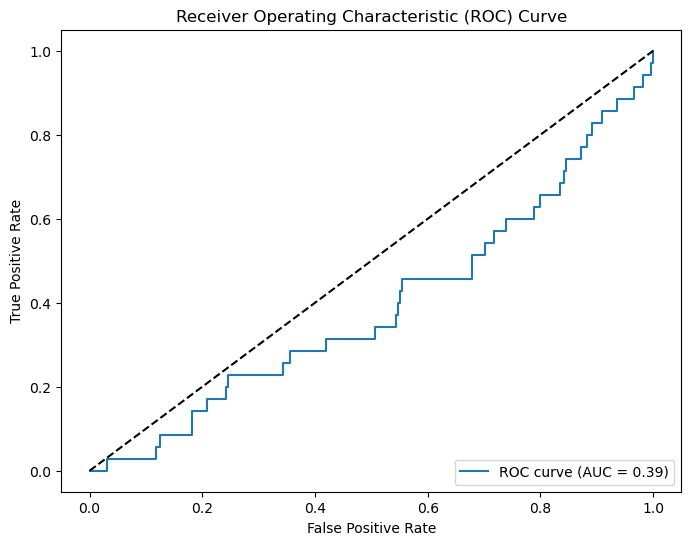

Optimal threshold: inf
Accuracy with optimal threshold: 0.8833333333333333 

Classification Report with optimal threshold:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       265
           1       1.00      0.00      0.00        35

    accuracy                           0.88       300
   macro avg       0.94      0.50      0.47       300
weighted avg       0.90      0.88      0.83       300



In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc  

# Generate an imbalanced dataset
np.random.seed(42)                   # Set random seed for reproducibility
n_samples = 1000                     # Total number of samples
X = np.random.randn(n_samples, 2)    # Feature matrix with 1000 samples and 2 features (normally distributed)
y = np.array([0] * 900 + [1] * 100)  # Imbalanced labels (900 samples of class 0 and 100 samples of class 1)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression with class_weight='balanced' to handle imbalanced data
logreg_balanced = LogisticRegression(class_weight='balanced', solver='lbfgs')  # Balanced logistic regression

# Fit the model to the training data
logreg_balanced.fit(X_train, y_train)

# Get predicted probabilities for class 1 (used for adjusting decision thresholds)
y_proba = logreg_balanced.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 from the test set

# Find the optimal threshold by plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)      # Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
roc_auc = auc(fpr, tpr)                                # Calculate the area under the ROC curve (AUC)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)  # Plot the ROC curve with AUC label
plt.plot([0, 1], [0, 1], 'k--')                                # Plot the random classifier line (diagonal)
plt.xlabel('False Positive Rate')                              # X-axis label
plt.ylabel('True Positive Rate')                               # Y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')     # Set title of the plot
plt.legend(loc='lower right')                                  # Place legend in the lower right corner
plt.show()                                                     # Display the plot

# Choose the optimal threshold based on the ROC curve (balancing TPR and FPR)
optimal_idx = np.argmax(tpr - fpr)                    # Find the index of the optimal threshold where TPR - FPR is maximized
optimal_threshold = thresholds[optimal_idx]           # Get the corresponding optimal threshold value
print(f"Optimal threshold: {optimal_threshold:.2f}")  # Print the optimal threshold

# Make predictions with the optimal threshold
y_pred_optimal_threshold = (y_proba >= optimal_threshold).astype(int)  # Predict class 1 if probability >= optimal threshold

# Evaluate the model's performance with the adjusted threshold
print("Accuracy with optimal threshold:", accuracy_score(y_test, y_pred_optimal_threshold),"\n")  
print("Classification Report with optimal threshold:\n", classification_report(y_test, y_pred_optimal_threshold, zero_division=1)) 

#### The optimal threshold being 'inf' indicates... 

... that the ROC curve calculations suggest a threshold so high that it effectively predicts class 0 for all samples. This results in an accuracy of 88.33% because the model correctly predicts the majority class (class 0), which represents 265 out of 300 samples in the test set.

However, this threshold completely ignores the minority class (class 1), resulting in:

    Precision for class 1 being undefined (hence set to 1 due to zero_division=1).
    Recall for class 1 being 0, as none of the actual class 1 samples were predicted correctly.

Why did this happen?

The dataset is highly imbalanced, and the model heavily favors predicting the majority class (class 0) because it dominates the dataset. When using the ROC curve to find an "optimal" threshold, the method can favor a threshold that minimizes false positives for class 0, at the cost of not predicting class 1 at all.

#### How to fix this?

we might want to adjust the threshold manually to ensure better balance between precision and recall, especially for the minority class, or try further techniques like:

- Undersampling the majority class.
- Oversampling the minority class (e.g., using SMOTE).
- Using different metrics like F1-score or ROC-AUC that consider the trade-off between precision and recall.
- For example, we can experiment with a lower threshold (e.g., 0.3 or 0.4) to capture more of the minority class:

In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report, accuracy_score  

# Generate an imbalanced dataset
np.random.seed(42)                   # Set random seed for reproducibility
n_samples = 1000                     # Set the total number of samples
X = np.random.randn(n_samples, 2)    # Generate a feature matrix with 1000 samples and 2 features (normally distributed)
y = np.array([0] * 900 + [1] * 100)  # Generate imbalanced labels (900 samples of class 0 and 100 samples of class 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split data into 70% train and 30% test

# Initialize Logistic Regression with class_weight='balanced'
logreg_balanced = LogisticRegression(class_weight='balanced', solver='lbfgs')              # Use balanced class weights to handle imbalanced data

# Fit the model
logreg_balanced.fit(X_train, y_train)              # Train the logistic regression model using the training data

# Make predictions on the test data
y_pred_balanced = logreg_balanced.predict(X_test)  # Predict labels for the test data

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_balanced),"\n")    # Calculate and print the accuracy of the model
print("Classification Report:\n", classification_report(y_test, y_pred_balanced, zero_division=1)) 

# Optionally, you can also adjust the decision threshold
y_proba = logreg_balanced.predict_proba(X_test)[:, 1]          # Get the predicted probabilities for class 1
new_threshold = 0.4                                            # Example: setting a new decision threshold at 0.4
y_pred_new_threshold = (y_proba >= new_threshold).astype(int)  # Predict class 1 if the probability is >= 0.4

# Evaluate performance with the new threshold
print("Classification Report with adjusted threshold:\n", classification_report(y_test, y_pred_new_threshold, zero_division=1)) 

Accuracy: 0.5233333333333333 

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.55      0.67       265
           1       0.08      0.31      0.13        35

    accuracy                           0.52       300
   macro avg       0.47      0.43      0.40       300
weighted avg       0.77      0.52      0.61       300

Classification Report with adjusted threshold:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       265
           1       0.12      1.00      0.21        35

    accuracy                           0.12       300
   macro avg       0.56      0.50      0.10       300
weighted avg       0.90      0.12      0.02       300



# Overfitting

### Ridge logistic regression (L2-regularization)

The **objective function** to be minimized is now the combination of the logistic loss (negative
log likelyhood) − log ℒ(𝑤) with a penalty of the L2 norm of the weights vector. 

In [24]:
# Dataset (Build a classification task using 3 informative features)
from sklearn import datasets                            
X, y = datasets.make_classification(n_samples=100,      # Create a dataset with 100 samples
                                    n_features=20,      # Each sample has 20 features
                                    n_informative=3,    # Out of 20 features, 3 are informative (meaningful for classification)
                                    n_redundant=0,      # No redundant features (no linear combinations of informative features)
                                    n_repeated=0,       # No repeated features (no duplicates of existing features)
                                    n_classes=2,        # The task is a binary classification (2 target classes)
                                    random_state=0,     # Set a seed for reproducibility
                                    shuffle=False)      # Do not shuffle the dataset after generation

In [25]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(C=1,             # Initialize logistic regression with regularization strength C=1
                                     solver='lbfgs')  # Use 'lbfgs' solver for optimization

# C is the Inverse of regularization strength
# Large value => no regularization

lr.fit(X, y)               # Fit the logistic regression model on the dataset
y_pred_lr = lr.predict(X)  # Predict the labels for the dataset X

# Retrieve proba from coef vector
print(lr.coef_.shape)                                                           # Print the shape of the coefficient vector
print()
probas = 1 / (1 + np.exp(- (np.dot(X, lr.coef_.T) + lr.intercept_))).ravel()    # Compute the probabilities manually using the logistic function
print("Diff", np.max(np.abs(lr.predict_proba(X)[:, 1] - probas)))               # Compare predicted probabilities from the model and manual calculation
print()

# plt.plot(lr.predict_proba(X)[:, 1], probas, "ob")                             # Option to plot the difference (commented out)
errors = y_pred_lr != y                                                         # Calculate errors (mismatches between predicted and true labels)
print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y)))  # Print the number of errors and error rate
print()
print(lr.coef_)                                                                 # Print the coefficients of the logistic regression model

(1, 20)

Diff 0.0

Nb errors=26, error rate=0.26

[[-0.12884025  0.75779166 -0.0124693  -0.11418158  0.25452359  0.43285005
   0.14572735  0.16783216  0.85075061  0.02124935 -0.16105335 -0.01481261
  -0.03401356  0.43143178 -0.05823997 -0.08122341  0.15853926  0.29388073
   0.54654474  0.03365654]]


#### Interpretation

`lr.coef_.shape: (1, 20)`: This indicates that the logistic regression model has 20 features (or input variables) in the dataset. 

`Diff 0.0`: The two methods of computing probabilities are identical or have negligible differences.

`Nb errors=26, error rate=0.26`: The model made 26 incorrect predictions out of 100 samples, resulting in an error rate of 26%. This means the model misclassified 26% of the samples.

`lr.coef_`: The values listed represent the coefficients for the 20 features in the logistic regression model. These coefficients indicate the strength and direction of the relationship between each feature and the predicted outcome. Positive values indicate that increasing that feature increases the likelihood of the positive class (class 1), and negative values indicate the opposite (decreases likelihood).

    Feature 1 has a coefficient of -0.12884025, which means it has a slight negative influence on the likelihood of the positive class.
    Feature 9 has a coefficient of 0.85075061, indicating a strong positive influence on the likelihood of class 1.

### Lasso logistic regression (L1-regularization)
The **objective function** to be minimized is now the combination of the logistic loss − log ℒ(𝑤)with a penalty of the L1 norm of the weights vector.

In [28]:
from sklearn import linear_model

lrl1 = linear_model.LogisticRegression(penalty='l1',   # Use L1 regularization (Lasso regularization)
                                       solver='saga')  # Use the 'saga' solver for L1 penalty

# C is the Inverse of regularization strength.
# Large value => no regularization.

lrl1.fit(X, y)                 # Fit the logistic regression model on dataset X and target y with L1 regularization
y_pred_lrl1 = lrl1.predict(X)  # Predict the target values using the fitted model
errors = y_pred_lrl1 != y      # Find prediction errors by comparing predicted values with actual values

print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y_pred_lrl1)))  # Print the number of prediction errors and error rate
print()
print(lrl1.coef_)   # Print the learned coefficients for each feature

Nb errors=25, error rate=0.25

[[-0.1260769   0.7168549   0.         -0.00516219  0.20417635  0.38222705
   0.07002116  0.06294327  0.76823508  0.         -0.10621999  0.
   0.          0.34001393  0.          0.          0.08033391  0.19204475
   0.47983718  0.        ]]


### Ridge linear Support Vector Machine (L2-regularization)

Support Vector Machine (SVM) seek for separating hyperplane with maximum margin to enforce robustness against noise. Like logistic regression it is a **discriminative method** that only focuses of predictions. Linear SVM is closed to Ridge logistic regression, using the hinge loss instead of the logistic loss. Both will provide very similar predictions.

In [30]:
from sklearn import svm 

svmlin = svm.LinearSVC()  # Initialize a linear Support Vector Classifier (SVC)

# Remark: by default LinearSVC uses squared_hinge as loss
# 'squared_hinge' loss is a variant of hinge loss used in SVM, which is smoother and has faster convergence.

svmlin.fit(X, y)                   # Fit the SVM model to the data (X) and labels (y)
y_pred_svmlin = svmlin.predict(X)  # Use the trained model to predict labels for dataset X
errors = y_pred_svmlin != y        # Calculate the number of errors by comparing the predicted and actual labels

print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y_pred_svmlin)))  # Print the number of errors and error rate
print()  
print(svmlin.coef_)                # Print the learned coefficients (weights) for the linear decision boundary

Nb errors=26, error rate=0.26

[[-0.05611863  0.31189281  0.00272031 -0.05148638  0.0994017   0.17726738
   0.06519685  0.08921146  0.3533917   0.00601367 -0.0620095  -0.00741311
  -0.02156571  0.18271506 -0.0216312  -0.04060576  0.0720412   0.13083409
   0.23721566  0.0082436 ]]


### Lasso linear Support Vector Machine (L1-regularization)
Linear SVM for classification (also called SVM-C or SVC) with l1-regularization.

In [32]:
from sklearn import svm

# Initialize a Linear SVC
svmlinl1 = svm.LinearSVC(penalty='l1', # L1 regularization encourages sparsity in the coefficients (many coefficients become 0)
                         dual=False)   # 'dual=False' is necessary when (# of samples) > (# of features) or when using L1 regularization

# Remark: by default LinearSVC uses squared_hinge as loss

svmlinl1.fit(X, y)                     # Fit the SVM model to the data (X) and labels (y) with L1 penalty
y_pred_svmlinl1 = svmlinl1.predict(X)  # Use the trained model to predict labels for the dataset X
errors = y_pred_svmlinl1 != y          # Calculate the number of errors by comparing predicted and actual labels

print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y_pred_svmlinl1)))  # Print the number of errors and error rate
print()
print(svmlinl1.coef_)                  # Print the learned coefficients (weights) for the linear decision boundary

Nb errors=26, error rate=0.26

[[-0.05334338  0.29935075  0.         -0.03541478  0.09261407  0.1676364
   0.05808182  0.07587622  0.3406528   0.         -0.05559088 -0.00193939
  -0.01312463  0.16866359 -0.01450207 -0.02500612  0.06074348  0.11738412
   0.22485637  0.00472914]]


### Exercise

Compare predictions of Logistic regression (LR) and their SVM counterparts, ie.: L2 LR vs L2 SVM and L1 LR vs L1 SVM

• Compute the correlation between pairs of weights vectors.

• Compare the predictions of two classifiers using their decision function:

    – Give the equation of the decision function for a linear classifier, assuming that their is no intercept.
    – Compute the correlation decision function.
    – Plot the pairwise decision function of the classifiers.
    
• Conclude on the differences between Linear SVM and logistic regression.

Correlation between L2 Logistic Regression and L2 SVM weights: 1.00
Correlation between L1 Logistic Regression and L1 SVM weights: 0.99
Correlation between L2 LR decision function and L2 SVM decision function weights: 1.00
Correlation between L1 LR decision function and L1 SVM decision function weights: 0.99



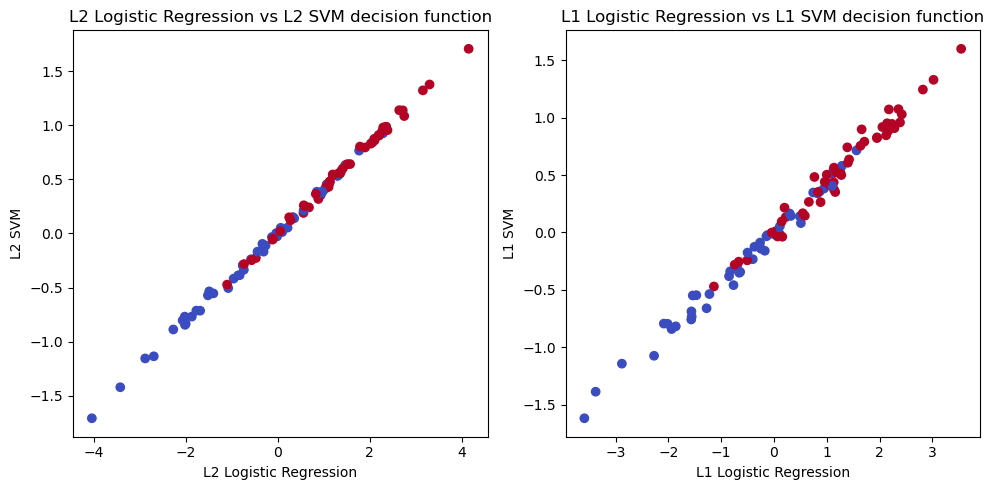

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, svm
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr

# Dataset creation
n_samples, n_features = 100, 20                                  # Define 100 samples and 20 features
X, y = datasets.make_classification(n_samples=100,      # Create a dataset with 100 samples
                                    n_features=20,      # Each sample has 20 features
                                    n_informative=3,    # Out of 20 features, 3 are informative (meaningful for classification)
                                    n_redundant=0,      # No redundant features (no linear combinations of informative features)
                                    n_repeated=0,       # No repeated features (no duplicates of existing features)
                                    n_classes=2,        # The task is a binary classification (2 target classes)
                                    random_state=0,     # Set a seed for reproducibility
                                    shuffle=False)      # Do not shuffle the dataset after generation

# Logistic Regression L2 (L2 Regularization)
lr_l2 = linear_model.LogisticRegression(penalty='l2', solver='lbfgs')  # Initialize Logistic Regression with L2 penalty
lr_l2.fit(X, y)                                                        # Fit the model to the dataset
lr_l2_coef = lr_l2.coef_                                               # Retrieve the coefficients (weights)

# Linear SVM L2 (L2 Regularization)
svm_l2 = svm.LinearSVC(penalty='l2', dual=False, loss='squared_hinge')  # Initialize Linear SVM with L2 penalty
svm_l2.fit(X, y)                                                        # Fit the model to the dataset
svm_l2_coef = svm_l2.coef_                                              # Retrieve the coefficients (weights)

# Logistic Regression L1 (L1 Regularization)
lr_l1 = linear_model.LogisticRegression(penalty='l1', solver='saga')  # Initialize Logistic Regression with L1 penalty
lr_l1.fit(X, y)                                                       # Fit the model to the dataset
lr_l1_coef = lr_l1.coef_                                              # Retrieve the coefficients (weights)

# Linear SVM L1 (L1 Regularization)
svm_l1 = svm.LinearSVC(penalty='l1', dual=False)  # Initialize Linear SVM with L1 penalty
svm_l1.fit(X, y)                                  # Fit the model to the dataset
svm_l1_coef = svm_l1.coef_                        # Retrieve the coefficients (weights)

# Compare weight vectors using Pearson correlation
def compare_weight_vectors(model1_coef, model2_coef, model1_name, model2_name):
    """Compute and print the correlation between two models' weight vectors."""
    correlation = pearsonr(model1_coef.ravel(), model2_coef.ravel())[0]   # Compute Pearson correlation between flattened weight vectors
    print(f"Correlation between {model1_name} and {model2_name} weights: {correlation:.2f}")  # Print the correlation

# Compare L2-regularized Logistic Regression and Linear SVM weight vectors
compare_weight_vectors(lr_l2_coef, svm_l2_coef, 'L2 Logistic Regression', 'L2 SVM')

# Compare L1-regularized Logistic Regression and Linear SVM weight vectors
compare_weight_vectors(lr_l1_coef, svm_l1_coef, 'L1 Logistic Regression', 'L1 SVM')

# Compare decision functions
def decision_function(X, model_coef):
    """Compute the decision function for a linear classifier."""
    return np.dot(X, model_coef.T)                   # Compute the dot product of X and the transposed coefficient vector

# Compute decision functions for both Logistic Regression and SVM (L2)
decision_lr_l2 = decision_function(X, lr_l2_coef)    # Decision function for L2 Logistic Regression
decision_svm_l2 = decision_function(X, svm_l2_coef)  # Decision function for L2 SVM

# Compute decision functions for both Logistic Regression and SVM (L1)
decision_lr_l1 = decision_function(X, lr_l1_coef)    # Decision function for L1 Logistic Regression
decision_svm_l1 = decision_function(X, svm_l1_coef)  # Decision function for L1 SVM

# Compare correlation of decision functions between L2 Logistic Regression and SVM
compare_weight_vectors(decision_lr_l2, decision_svm_l2, 'L2 LR decision function', 'L2 SVM decision function')

# Compare correlation of decision functions between L1 Logistic Regression and SVM
compare_weight_vectors(decision_lr_l1, decision_svm_l1, 'L1 LR decision function', 'L1 SVM decision function')

print()

# Plot decision functions for L2 Logistic Regression vs L2 SVM
plt.figure(figsize=(10, 5))   # Set figure size

plt.subplot(121)                                                    # Create first subplot for L2 comparison
plt.scatter(decision_lr_l2, decision_svm_l2, c=y, cmap='coolwarm')  # Plot decision function values for L2 models
plt.title("L2 Logistic Regression vs L2 SVM decision function")     # Title of the subplot
plt.xlabel("L2 Logistic Regression")                                # Label x-axis
plt.ylabel("L2 SVM")                                                # Label y-axis

# Plot decision functions for L1 Logistic Regression vs L1 SVM
plt.subplot(122)  # Create second subplot for L1 comparison
plt.scatter(decision_lr_l1, decision_svm_l1, c=y, cmap='coolwarm')  # Plot decision function values for L1 models
plt.title("L1 Logistic Regression vs L1 SVM decision function")     # Title of the subplot
plt.xlabel("L1 Logistic Regression")                                # Label x-axis
plt.ylabel("L1 SVM")                                                # Label y-axis

plt.tight_layout()  # Adjust layout for better spacing
plt.show()          # Display the plots

#### Conclusion:
The perfect correlations suggest that in this specific case, Logistic Regression and SVM are finding very similar solutions for both L2 and L1 regularization. This occurs because both methods are linear classifiers and operate similarly in high-dimensional space when applied to the same dataset. The choice between Logistic Regression and SVM in this scenario may not significantly impact performance, but it could in cases where the data is more complex or the regularization plays a larger role in controlling model complexity.

### Elastic-net classification (L2-L1-regularization)
The **objective function** to be minimized is now the combination of the logistic loss log 𝐿(𝑤) or the hinge loss with combination of L1 and L2 penalties.

Hinge loss and logistic loss provide almost the same predictions.

Confusion matrix:
[[46  3]
 [ 0 51]]

Decision_function log x hinge losses:


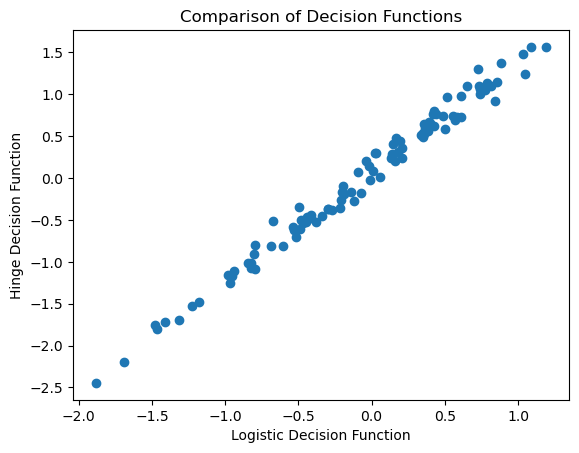

In [37]:
from sklearn import metrics  
from sklearn import linear_model as lm 
import matplotlib.pyplot as plt  
from sklearn import datasets   

# Generate a synthetic dataset with 100 samples and 20 features
X, y = datasets.make_classification(n_samples=100,    # Number of samples (rows)
                                    n_features=20,    # Number of features (columns)
                                    n_informative=3,  # Number of informative features
                                    n_redundant=0,    # Number of redundant features
                                    n_repeated=0,     # Number of repeated features
                                    n_classes=2,      # Number of output classes (binary classification)
                                    random_state=0,   # Random state for reproducibility
                                    shuffle=False)    # Don't shuffle the dataset

# Create an ElasticNet logistic regression model (logistic loss)
enetlog = lm.SGDClassifier(loss="log_loss",       # Use logistic loss for logistic regression
                           penalty="elasticnet",  # Apply ElasticNet regularization
                           alpha=0.1,             # Regularization strength
                           l1_ratio=0.5,          # Balance between L1 and L2 regularization
                           random_state=42)       # Set random state for reproducibility

enetlog.fit(X, y)  # Fit the logistic regression model on the dataset

# Create an ElasticNet SVM model using hinge loss
enethinge = lm.SGDClassifier(loss="hinge",          # Use hinge loss for support vector machine (SVM)
                             penalty="elasticnet",  # Apply ElasticNet regularization
                             alpha=0.1,             # Regularization strength
                             l1_ratio=0.5,          # Balance between L1 and L2 regularization
                             random_state=42)       # Set random state for reproducibility

enethinge.fit(X, y)  # Fit the SVM model on the dataset

# Print a message about hinge loss and logistic loss predictions
print("Hinge loss and logistic loss provide almost the same predictions.")
print()

# Print confusion matrix comparing predictions from both models
print("Confusion matrix:")
print(metrics.confusion_matrix(enetlog.predict(X), enethinge.predict(X)))
print()

# Plot the decision functions from both models
print("Decision_function log x hinge losses:")
_ = plt.plot(enetlog.decision_function(X),    # Logistic regression decision function values
             enethinge.decision_function(X),  # SVM decision function values
             "o")                             # Use circles for the scatter plot points

# Add labels and title to the plot
plt.xlabel('Logistic Decision Function')       # X-axis label for logistic decision function
plt.ylabel('Hinge Decision Function')          # Y-axis label for hinge decision function
plt.title('Comparison of Decision Functions')  # Title for the plot
plt.show()                                     # Display the plot

### Exercise
Compare predictions of Elastic-net Logistic regression (LR) and Hinge-loss Elastic-net

• Compute the correlation between pairs of weights vectors.

• Compare the predictions of two classifiers using their decision function:

    – Compute the correlation decision function.
    – Plot the pairwise decision function of the classifiers.
    
• Conclude on the differences between the two losses.

Correlation between Elastic-net Logistic Regression and Hinge-loss Elastic-net weights: 0.99
Correlation between decision functions: 0.99



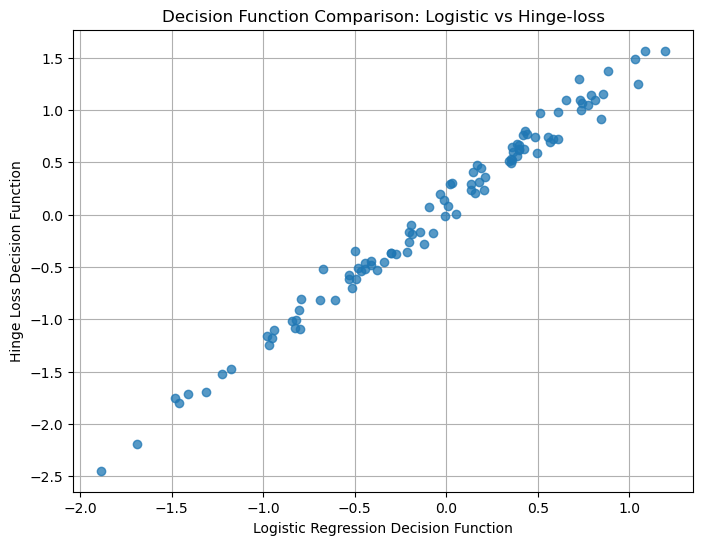

In [39]:
# Import necessary libraries
from sklearn import datasets                # For generating the dataset
from sklearn import linear_model as lm      # For logistic regression and SGD classifiers
from sklearn import metrics                 # For computing evaluation metrics
import numpy as np                          # For numerical operations
import matplotlib.pyplot as plt             # For plotting

# Step 1: Generate a synthetic classification dataset ====================================
X, y = datasets.make_classification(n_samples=100,    # 100 samples
                                    n_features=20,    # 20 features
                                    n_informative=3,  # 3 informative features
                                    n_redundant=0,    # No redundant features
                                    n_repeated=0,     # No repeated features
                                    n_classes=2,      # Binary classification (2 classes)
                                    random_state=0,   # Set random seed for reproducibility
                                    shuffle=False)    # Don't shuffle the dataset

# Step 2: Elastic-net Logistic Regression (logistic loss) =================================
enetlog = lm.SGDClassifier(loss="log_loss",       # Logistic loss (logistic regression)
                           penalty="elasticnet",  # Use Elastic-net regularization (L1 + L2)
                           alpha=0.1,             # Regularization strength
                           l1_ratio=0.5,          # Ratio between L1 and L2 regularization
                           random_state=42)       # Set random seed for reproducibility

enetlog.fit(X, y)    # Fit the Elastic-net logistic regression model to the dataset

# Step 3: Elastic-net SVM (hinge loss) ====================================================
enethinge = lm.SGDClassifier(loss="hinge",          # Hinge loss (SVM)
                             penalty="elasticnet",  # Use Elastic-net regularization (L1 + L2)
                             alpha=0.1,             # Regularization strength
                             l1_ratio=0.5,          # Ratio between L1 and L2 regularization
                             random_state=42)       # Set random seed for reproducibility

enethinge.fit(X, y)  # Fit the Elastic-net hinge loss model (SVM) to the dataset

# Step 4: Compute the correlation between the weight vectors of both models ===============
# This measures how similar the learned weights are between the two models.
corr_weights = np.corrcoef(enetlog.coef_.ravel(), enethinge.coef_.ravel())[0, 1]  # Correlation between weights
print(f"Correlation between Elastic-net Logistic Regression and Hinge-loss Elastic-net weights: {corr_weights:.2f}")

# Step 5: Compute decision functions for both models ======================================
# The decision function outputs the raw predictions before applying a threshold to classify data points.
logistic_decision_function = enetlog.decision_function(X)  # Decision function for logistic regression
hinge_decision_function = enethinge.decision_function(X)   # Decision function for hinge-loss SVM

# Step 6: Compute the correlation between the decision functions ==========================
# This shows how similar the prediction confidence scores are between the two models.
corr_decision_func = np.corrcoef(logistic_decision_function, hinge_decision_function)[0, 1]  # Correlation between decision functions
print(f"Correlation between decision functions: {corr_decision_func:.2f}")
print()

# Step 7: Plot the pairwise decision function of the two classifiers ======================
# We plot the decision function values from logistic regression against the hinge-loss SVM.
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(logistic_decision_function, hinge_decision_function, 'o', alpha=0.75)  # Plot decision functions
plt.xlabel("Logistic Regression Decision Function")                             # Label for the x-axis
plt.ylabel("Hinge Loss Decision Function")                                      # Label for the y-axis
plt.title("Decision Function Comparison: Logistic vs Hinge-loss")               # Title of the plot
plt.grid(True)  # Add grid lines to the plot for better readability
plt.show()      # Display the plot

#### Explanation:

- Elastic-net Logistic Regression: Optimizes for the `log_loss`, which tries to directly model probabilities.

- Elastic-net SVM (Hinge Loss): Optimizes for the `hinge loss`, which focuses on maximizing the margin between classes.

Typically, both models may give similar predictions, but *the logistic regression model will tend to provide better probability estimates*, while *hinge loss (SVM) focuses on classification margins and may be more robust to outliers*. However, the choice between them will depend on whether the problem at hand requires probability estimates or simply classification.

The results we get (correlation values and visual plots) will help reinforce these differences based on the dataset used.

#### Conclusion:

- Both models provide similar results, with high correlations between their weight vectors and decision functions.

- The Elastic-net regularization helps both models to generalize well by penalizing coefficients.

- Logistic regression optimizes for probabilities, while SVM (hinge loss) focuses on maximizing the margin between classes.

# Metrics of Classification Performance Evaluation

## Metrics for Binary Classification

Imagine a study evaluating a new test that screens people for a disease. Each person taking the test either has or does not have the disease. The test outcome can be positive (classifying the person as having the disease) or negative (classifying the person as not having the disease). The test results for each subject may or may not match the subject’s actual status. In that setting:

    • True positive (TP): Sick people correctly identified as sick
    • False positive (FP): Healthy people incorrectly identified as sick
    • True negative (TN): Healthy people correctly identified as healthy
    • False negative (FN): Sick people incorrectly identified as healthy
    
    • Accuracy (ACC):
    
        ACC = (TP + TN) / (TP + FP + FN + TN)
        
    • Sensitivity (SEN) or recall of the positive class or true positive rate (TPR) or hit rate:
    
        SEN = TP / P = TP / (TP+FN)
        
    • Specificity (SPC) or recall of the negative class or true negative rate:
    
        SPC = TN / N = TN / (TN+FP)
        
    • Precision or positive predictive value (PPV):
    
        PPV = TP / (TP + FP)
        
    • Balanced accuracy (bACC):is a useful performance measure is the balanced accuracy which avoids inflated performance estimates on imbalanced datasets (Brodersen, et al. (2010). “The balanced accuracy and its posterior distribution”). It is defined as the arithmetic mean of sensitivity and specificity, or the average accuracy obtained on either class:
    
        bACC = 1/2 * (SEN + SPC)
        
    • F1 Score (or F-score) which is a weighted average of precision and recall are usefull todeal with imballaced datasets.

In [43]:
from sklearn import metrics  # Importing metrics module from sklearn for evaluating performance metrics

# Predicted and actual labels
y_pred = [0, 1, 0, 0]  # List of predicted labels
y_true = [0, 1, 0, 1]  # List of actual/true labels

# 1. Accuracy Score: Calculate how often the model's predictions match the true labels
accuracy = metrics.accuracy_score(y_true, y_pred)  # Compute accuracy
print(f"Accuracy: {accuracy:.2f}")                 # Print accuracy
print()

# 2. Overall Precision: How many selected items are relevant (for class 1 by default)
precision = metrics.precision_score(y_true, y_pred)  # Compute precision (default: for positive class)
print(f"Precision (class 1): {precision:.2f}")       # Print precision
print()

# 3. Overall Recall: How many relevant items are selected (for class 1 by default)
recall = metrics.recall_score(y_true, y_pred)  # Compute recall (default: for positive class)
print(f"Recall (class 1, Sensitivity): {recall:.2f}")  # Print recall
print()

# 4. Recalls on individual classes (Sensitivity and Specificity)
# Recall score for each class (class 0 and class 1)
recalls = metrics.recall_score(y_true, y_pred, average=None)  # Compute recall for each class

specificity = recalls[0]  # Recall for class 0 (specificity)
sensitivity = recalls[1]  # Recall for class 1 (sensitivity)
print(f"Specificity (class 0): {specificity:.2f}")  # Print specificity
print(f"Sensitivity (class 1): {sensitivity:.2f}")  # Print sensitivity
print()

# 5. Balanced Accuracy: The average of sensitivity and specificity
b_acc = recalls.mean()                    # Compute balanced accuracy
print(f"Balanced Accuracy: {b_acc:.2f}")  # Print balanced accuracy
print()

# 6. Precision, Recall, F-score, and Support for each individual class
p, r, f, s = metrics.precision_recall_fscore_support(y_true, y_pred)  # Compute precision, recall, f1-score, and support for each class

# Print the precision, recall, F1-score, and support for both classes
print(f"Precision for class 0: {p[0]:.2f}, class 1: {p[1]:.2f}")  # Precision for each class
print(f"Recall for class 0: {r[0]:.2f}, class 1: {r[1]:.2f}")     # Recall for each class
print(f"F1-Score for class 0: {f[0]:.2f}, class 1: {f[1]:.2f}")   # F1-Score for each class
print(f"Support for class 0: {s[0]}, class 1: {s[1]}")            # Support (number of occurrences) for each class

Accuracy: 0.75

Precision (class 1): 1.00

Recall (class 1, Sensitivity): 0.50

Specificity (class 0): 1.00
Sensitivity (class 1): 0.50

Balanced Accuracy: 0.75

Precision for class 0: 0.67, class 1: 1.00
Recall for class 0: 1.00, class 1: 0.50
F1-Score for class 0: 0.80, class 1: 0.67
Support for class 0: 2, class 1: 2


#### Interpretation

`Accuracy: 0.75` (the model predicted 3 out of 4 labels correctly).

`Precision: 1.00` (the model correctly predicted class 1).

`Recall: 0.50` (only half of the true class 1 labels were correctly predicted).

`Specificity (class 0): 1.00` (all class 0 labels were predicted correctly).
`Specificity (class 1): 0.50` (only half of class 1 labels were predicted correctly).

`Balanced Accuracy: 0.75` (the average of 1.00 for specificity and 0.50 for sensitivity).

                 Class 0   Class 1
    Precision     0.67      1.00   
    Recall        1.00      0.50   
    F1-Score      0.80      0.67    
    Support          2         2

## Significance of Classification Rate

P-value associated to classification rate. Compared the number of correct classifications (=accuracy ×𝑁) to the null hypothesis of Binomial distribution of parameters 𝑝 (typically 50% of chance level) and 𝑁 (Number of observations).

Is 65% of accuracy a significant prediction rate among 70 observations?

Since this is an exact, **two-sided** test of the null hypothesis, the p-value can be divided by 2 since we test that the accuracy is superior to the chance level.

In [46]:
import scipy.stats 

# Define accuracy and number of observations
acc, N = 0.65, 70  # acc = accuracy (65%), N = total number of observations (70)

# Perform a binomial test to determine if the observed accuracy is significantly different from chance level
pval = scipy.stats.binomtest(k=int(acc * N), # Number of correct classifications (0.65 * 70 = 45.5, rounded to 45)
                             n=N,            # Total number of trials (70 observations)
                             p=0.5           # Probability under the null hypothesis (50% chance level)
                             ).pvalue / 2    # Get the p-value and divide by 2 to obtain a one-sided p-value (testing if accuracy is higher than chance)

# Print the computed p-value
print("P-value:",round(pval,4))

P-value: 0.0112


#### Explanation:

- Goal: 

We want to assess whether an observed accuracy of 65% over 70 observations is statistically significant. The null hypothesis (H₀) assumes that the classification rate is due to random guessing, with a chance level of 50%.

- Binomial Test:

We're using a binomial test, which is appropriate when we are comparing observed outcomes to what we would expect under a binomial distribution (e.g., flipping a fair coin).
The test checks if the number of correct classifications (in this case, 65% of 70 observations) is significantly better than random guessing (50%).
Two-sided test:

The binomial test by default is two-sided, testing if the accuracy is significantly different (higher or lower) than 50%.
Since we're specifically interested in testing whether the accuracy is better than chance, we divide the p-value by 2 to make it a one-sided test.

- p-value:

The resulting p-value is 0.0112, which indicates the probability of observing 65% accuracy (or better) purely by chance under the null hypothesis (50% chance).
A low p-value (typically < 0.05) suggests that the result is statistically significant, meaning it's unlikely to have occurred by chance.

#### Interpretation of the result:

- p-value = 0.0112:

This p-value is less than 0.05, meaning that the observed accuracy of 65% is significantly better than the 50% chance level.
Therefore, we can reject the null hypothesis and conclude that the classifier's performance is significantly better than random guessing at a 95% confidence level.

#### Conclusion:

A p-value of 0.0112 shows that 65% accuracy in a classification task with 70 observations is statistically significant, and the model's prediction rate is better than a random classifier with a 50% chance level.

## Area Under Curve (AUC) of Receiver operating characteristic (ROC)

Some classifier may have found a good discriminative projection 𝑤. However if the threshold
to decide the final predicted class is poorly adjusted, the performances will highlight an high
specificity and a low sensitivity or the contrary.

In this case it is recommended to use the AUC of a ROC analysis which basically provide a measure of overlap of the two classes when points are projected on the discriminative axis. For more detail on ROC and AUC.

In [50]:
from sklearn import metrics  # Import the metrics module from sklearn for evaluation functions

# Define score predictions for 8 samples
score_pred = np.array([.1, .2, .3, .4, .5, .6, .7, .8])  # Scores assigned to the samples by the model

# Define true labels (ground truth) for these samples
y_true = np.array([0, 0, 0, 0, 1, 1, 1, 1])              # True class labels (4 negatives and 4 positives)

# Set a threshold for making class predictions from the score predictions
thres = .9                                               # Any score > 0.9 will be classified as class 1, otherwise class 0

# Generate predictions by applying the threshold on the score predictions
y_pred = (score_pred > thres).astype(int)                # Convert scores to binary predictions using the threshold
print("Predictions:", y_pred)                            # Output the predictions

# Compute and print accuracy
metrics.accuracy_score(y_true, y_pred)                   # Calculate the accuracy (ratio of correct predictions)

# Calculate precision, recall, F1-score, and support for each class (0 and 1)
p, r, f, s = metrics.precision_recall_fscore_support(y_true, y_pred, zero_division=1)  # zero_division handles cases where precision is undefined
print("Recalls:", r)                             # Output recall values for both classes (specificity for class 0 and sensitivity for class 1)

# Specificity (class 0 recall) is 100%, sensitivity (class 1 recall) is 0%

# Calculate AUC (Area Under the ROC Curve) based on score predictions
auc = metrics.roc_auc_score(y_true, score_pred)  # Compute AUC score to measure how well the classifier separates the classes
print("AUC:", auc)                               # Output AUC score, which is 1.0 indicating perfect class separation

Predictions: [0 0 0 0 0 0 0 0]
Recalls: [1. 0.]
AUC: 1.0


#### Interpretation

We apply a threshold of 0.9 on the score predictions, which results in all predictions being classified as 0 (negative class). This is because none of the score_pred values exceed 0.9.

    Recall for class 0 (specificity) is 1.0, meaning all instances of class 0 were correctly predicted as 0.
    Recall for class 1 (sensitivity) is 0.0, meaning none of the class 1 instances were correctly predicted.

AUC measures the ability of the classifier to separate the classes. In this case, the classifier perfectly separates the two classes based on the score predictions (even though it predicted all as 0 due to the high threshold). This is why the AUC score is 1.0.

In [52]:
# Import necessary libraries
from sklearn import linear_model             
from sklearn import datasets                
from sklearn import metrics                  

# Generate a balanced classification dataset with 500 samples and 5 features
X, y = datasets.make_classification(n_samples=500,   # Number of samples
                                    n_features=5,    # Total number of features
                                    n_informative=2, # Number of informative features (affect the target)
                                    n_redundant=0,   # No redundant features
                                    n_repeated=0,    # No repeated features
                                    n_classes=2,     # Binary classification problem (2 classes)
                                    random_state=1,  # Random seed for reproducibility
                                    shuffle=False)   # Do not shuffle the dataset

# Print the number of samples in each class
print(*["#samples of class %i = %i;" % (lev, np.sum(y == lev)) for lev in np.unique(y)])  # Unique class distribution

# No Reweighting on the balanced dataset
print('# No Reweighting balanced dataset')
lr_inter = linear_model.LogisticRegression(C=1)  # Initialize logistic regression with no regularization (C=1)
lr_inter.fit(X, y)                               # Fit the logistic regression model on the balanced dataset
p, r, f, s = metrics.precision_recall_fscore_support(y, lr_inter.predict(X))  # Get precision, recall, F1-score
print("SPC: %.3f; SEN: %.3f" % tuple(r))         # Print specificity (SPC = recall of class 0) and sensitivity (SEN = recall of class 1)
print('# => The predictions are balanced in sensitivity and specificity\n')

# Create an imbalanced dataset by subsampling class 0 (keeping only 10% of class 0 samples)
n0 = int(np.rint(np.sum(y == 0) / 20))           # Keep only 10% of class 0's samples
subsample_idx = np.concatenate((np.where(y == 0)[0][:n0], np.where(y == 1)[0]))  # Indices of the remaining samples (class 0 + all class 1)
Ximb = X[subsample_idx, :]                       # Create the imbalanced feature matrix
yimb = y[subsample_idx]                          # Create the imbalanced target vector

# Print the number of samples in each class after subsampling
print(*["#samples of class %i = %i;" % (lev, np.sum(yimb == lev)) for lev in np.unique(yimb)])

# No Reweighting on the imbalanced dataset
print('# No Reweighting on imbalanced dataset')
lr_inter = linear_model.LogisticRegression(C=1)  # Initialize logistic regression with no regularization (C=1)
lr_inter.fit(Ximb, yimb)                         # Fit the logistic regression model on the imbalanced dataset
p, r, f, s = metrics.precision_recall_fscore_support(yimb, lr_inter.predict(Ximb))  # Get precision, recall, F1-score
print("SPC: %.3f; SEN: %.3f" % tuple(r))         # Print specificity (SPC = recall of class 0) and sensitivity (SEN = recall of class 1)
print('# => Sensitivity >> specificity\n')

# Reweighting on the imbalanced dataset (to correct imbalance using class_weight='balanced')
print('# Reweighting on imbalanced dataset')
lr_inter_reweight = linear_model.LogisticRegression(C=1, class_weight="balanced")            # Apply reweighting for imbalanced classes
lr_inter_reweight.fit(Ximb, yimb)                # Fit the logistic regression model on the imbalanced dataset with reweighting
p, r, f, s = metrics.precision_recall_fscore_support(yimb, lr_inter_reweight.predict(Ximb))  # Get precision, recall, F1-score
print("SPC: %.3f; SEN: %.3f" % tuple(r))         # Print specificity (SPC = recall of class 0) and sensitivity (SEN = recall of class 1)
print('# => The predictions are balanced in sensitivity and specificity\n')

#samples of class 0 = 250; #samples of class 1 = 250;
# No Reweighting balanced dataset
SPC: 0.940; SEN: 0.928
# => The predictions are balanced in sensitivity and specificity

#samples of class 0 = 12; #samples of class 1 = 250;
# No Reweighting on imbalanced dataset
SPC: 0.750; SEN: 0.996
# => Sensitivity >> specificity

# Reweighting on imbalanced dataset
SPC: 1.000; SEN: 0.980
# => The predictions are balanced in sensitivity and specificity



In [53]:
## Imbalanced Classes

import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
# dataset
X, y = datasets.make_classification(n_samples=500,
n_features=5,
n_informative=2,
n_redundant=0,
n_repeated=0,
n_classes=2,
random_state=1,
shuffle=False)
print(*["#samples of class %i = %i;" % (lev, np.sum(y == lev)) for lev in np.unique(y)])
print('# No Reweighting balanced dataset')
lr_inter = linear_model.LogisticRegression(C=1)
lr_inter.fit(X, y)
p, r, f, s = metrics.precision_recall_fscore_support(y, lr_inter.predict(X))
print("SPC: %.3f; SEN: %.3f" % tuple(r))
print('# => The predictions are balanced in sensitivity and specificity\n')
# Create imbalanced dataset, by subsampling sample of class 0: keep only 10% of
# class 0's samples and all class 1's samples.
n0 = int(np.rint(np.sum(y == 0) / 20))
subsample_idx = np.concatenate((np.where(y == 0)[0][:n0], np.where(y == 1)[0]))
Ximb = X[subsample_idx, :]
yimb = y[subsample_idx]
print(*["#samples of class %i = %i;" % (lev, np.sum(yimb == lev)) for lev in
np.unique(yimb)])
print('# No Reweighting on imbalanced dataset')
lr_inter = linear_model.LogisticRegression(C=1)
lr_inter.fit(Ximb, yimb)
p, r, f, s = metrics.precision_recall_fscore_support(yimb, lr_inter.predict(Ximb))
print("SPC: %.3f; SEN: %.3f" % tuple(r))
print('# => Sensitivity >> specificity\n')
print('# Reweighting on imbalanced dataset')
lr_inter_reweight = linear_model.LogisticRegression(C=1, class_weight="balanced")
lr_inter_reweight.fit(Ximb, yimb)
p, r, f, s = metrics.precision_recall_fscore_support(yimb,
lr_inter_reweight.predict(Ximb))
print("SPC: %.3f; SEN: %.3f" % tuple(r))
print('# => The predictions are balanced in sensitivity and specificity\n')

#samples of class 0 = 250; #samples of class 1 = 250;
# No Reweighting balanced dataset
SPC: 0.940; SEN: 0.928
# => The predictions are balanced in sensitivity and specificity
#samples of class 0 = 12; #samples of class 1 = 250;
# No Reweighting on imbalanced dataset
SPC: 0.750; SEN: 0.996
# => Sensitivity >> specificity
# Reweighting on imbalanced dataset
SPC: 1.000; SEN: 0.980
# => The predictions are balanced in sensitivity and specificity

#samples of class 0 = 250; #samples of class 1 = 250;
# No Reweighting balanced dataset
SPC: 0.940; SEN: 0.928
# => The predictions are balanced in sensitivity and specificity

#samples of class 0 = 12; #samples of class 1 = 250;
# No Reweighting on imbalanced dataset
SPC: 0.750; SEN: 0.996
# => Sensitivity >> specificity

# Reweighting on imbalanced dataset
SPC: 1.000; SEN: 0.980
# => The predictions are balanced in sensitivity and specificity



#### Explanation of Concepts:
Balanced vs. Imbalanced Dataset:

Initially, the dataset is balanced with 250 samples from each class (0 and 1).
The code then introduces an imbalance by keeping only 10% of class 0 samples, while retaining all samples of class 1. The new dataset becomes highly imbalanced with just 12 samples of class 0 and 250 samples of class 1.
Logistic Regression:

The logistic regression model is trained both on a balanced dataset and an imbalanced dataset.
Logistic regression predicts probabilities of each class, which are then thresholded to assign class labels.
No Reweighting:

When no class reweighting is applied, the classifier tends to favor the majority class (class 1 in the imbalanced dataset). This leads to high sensitivity (ability to correctly predict class 1) but poor specificity (ability to correctly predict class 0).
Reweighting:

To handle the class imbalance, class_weight="balanced" is used. This parameter adjusts the weights inversely proportional to class frequencies, ensuring that class 0 gets higher weight since it is underrepresented.
After applying reweighting, the model achieves a better balance between sensitivity and specificity.
#### Key Outputs and Interpretation:

Balanced Dataset:

- Specificity (SPC): 0.940 (94% correct classification for class 0)
- Sensitivity (SEN): 0.928 (92.8% correct classification for class 1)

The model performs well in predicting both classes, with balanced sensitivity and specificity.

Imbalanced Dataset (Without Reweighting):

- Specificity (SPC): 0.750 (75% correct classification for class 0)
- Sensitivity (SEN): 0.996 (99.6% correct classification for class 1)

The model favors the majority class (class 1), leading to high sensitivity but low specificity.

Imbalanced Dataset (With Reweighting):

- Specificity (SPC): 1.000 (100% correct classification for class 0)
- Sensitivity (SEN): 0.980 (98% correct classification for class 1)

Reweighting the model balances the predictions, improving the performance for class 0 while maintaining good performance for class 1.

#### Conclusion:
Class imbalance significantly affects the performance of logistic regression. **Without reweighting, the model tends to predict the majority class more frequently, leading to high sensitivity but poor specificity.**
Using `class_weight="balanced"` in logistic regression helps mitigate the impact of imbalanced data by adjusting class weights, leading to more balanced predictions for both classes.

## Exercise
### Fisher linear discriminant rule
Write a class FisherLinearDiscriminant that implements the Fisher’s linear discriminant analysis. This class must be compliant with the scikit-learn API by providing two methods: 

- fit(X,y) which fits the model and returns the object itself;
- predict(X) which returns a vector of the predicted values.

Apply the object on the dataset presented for the LDA.

In [56]:
class FisherLinearDiscriminant:
    """
    Fisher's Linear Discriminant Classifier that follows the scikit-learn API.

    Methods:
    - fit(X, y): Fits the model based on input data X and labels y.
    - predict(X): Predicts the class labels for input data X.
    """
    
    def fit(self, X, y):
        """
        Fit the Fisher Linear Discriminant model.

        Parameters:
        X: Input feature matrix (n_samples, n_features)
        y: Target vector (n_samples,), binary class labels (0 or 1)

        Returns:
        self: The fitted object
        """
        # Separate the data based on class labels
        self.classes_ = np.unique(y)   # Get the unique class labels
        X0 = X[y == self.classes_[0]]  # Data points for class 0
        X1 = X[y == self.classes_[1]]  # Data points for class 1

        # Compute the mean vectors for each class
        mean_0 = np.mean(X0, axis=0)  # Mean vector of class 0
        mean_1 = np.mean(X1, axis=0)  # Mean vector of class 1

        # Compute within-class scatter matrices
        S_w = np.dot((X0 - mean_0).T, (X0 - mean_0)) + np.dot((X1 - mean_1).T, (X1 - mean_1))

        # Compute the Fisher discriminant vector (w)
        self.w_ = np.dot(np.linalg.inv(S_w), (mean_1 - mean_0))     # Fisher's discriminant vector

        # Compute the threshold (the point that maximizes class separation)
        self.threshold_ = np.dot(self.w_.T, (mean_0 + mean_1) / 2)  # Threshold for decision boundary

        return self  # Return the fitted model

    def predict(self, X):
        """
        Predict the class labels using the fitted model.

        Parameters:
        X: Input feature matrix (n_samples, n_features)

        Returns:
        predictions: Predicted class labels (n_samples,)
        """
        # Project the input data onto the Fisher discriminant vector
        projections = np.dot(X, self.w_)

        # Predict class labels based on threshold
        predictions = np.where(projections > self.threshold_, self.classes_[1], self.classes_[0])

        return predictions  # Return the predicted class labels

In [57]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset and select only two classes for binary classification (for example, class 0 and class 1)
iris = load_iris()
X = iris.data[iris.target != 2]    # Use only classes 0 and 1
y = iris.target[iris.target != 2]  # Class labels for 0 and 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Fisher Linear Discriminant model
fld = FisherLinearDiscriminant()

# Fit the model to the training data
fld.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = fld.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%
